In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)['0']

In [8]:
x.head()

0    1.462108
1    1.133769
2   -2.301539
3    1.744812
4    0.042214
Name: 0, dtype: float64

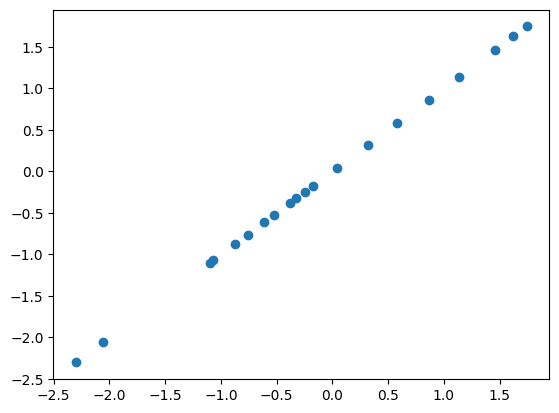

In [9]:
plt.figure()
plt.scatter(x, y)
plt.show()

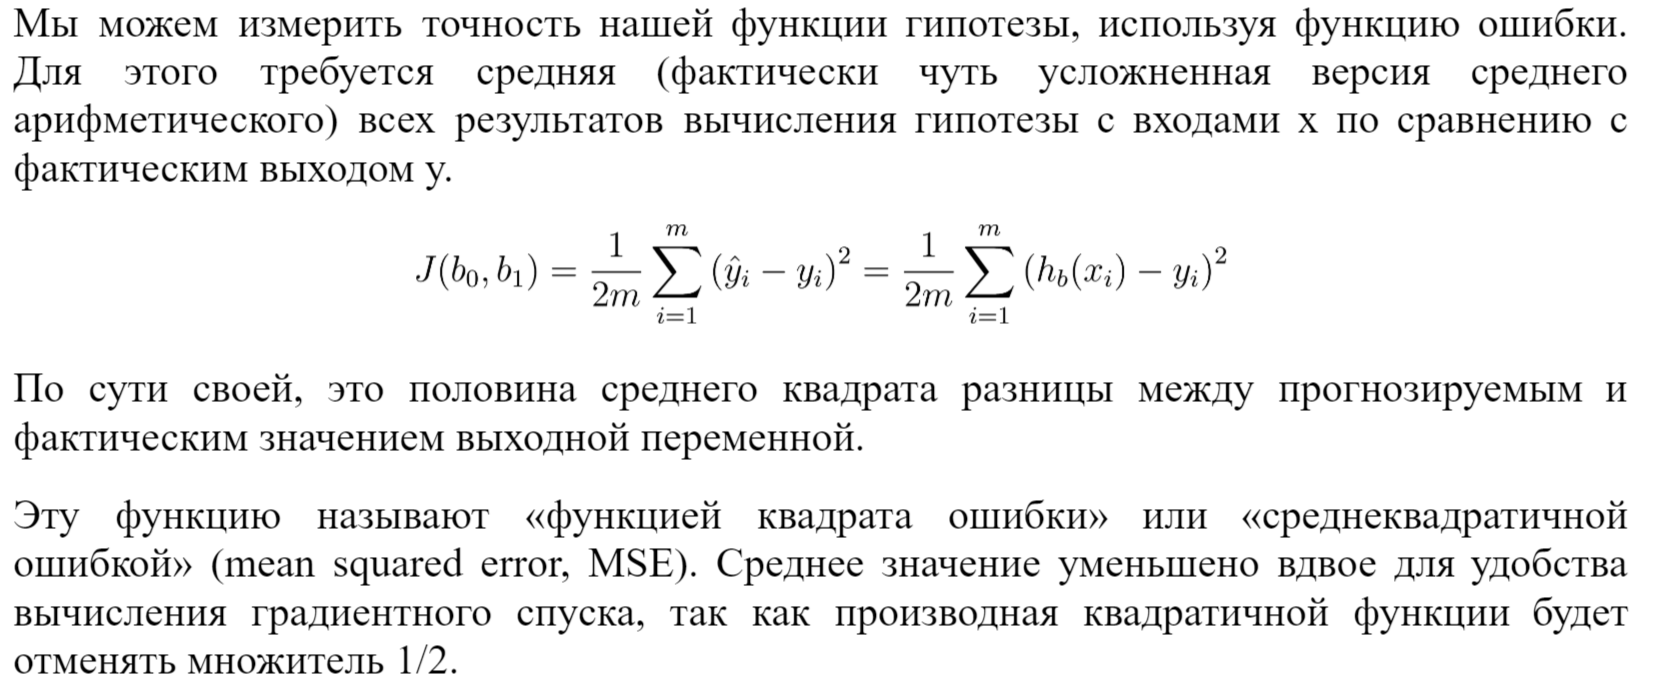

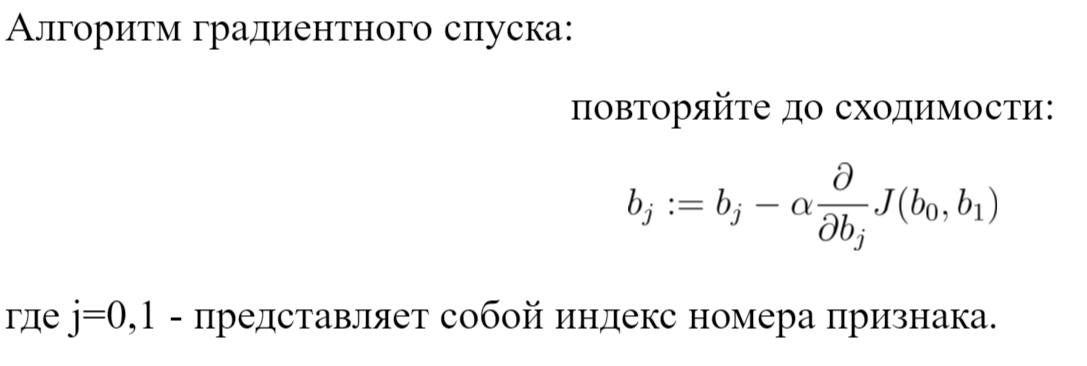

In [10]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, x):
      return self.b0 + self.b1 * x
    def error(self, X, Y):
        return sum((self.predict(X) - Y)**2) / (2 * len(X))
    def fit(self, X, Y):
        alpha = 0.1
        dJ0 = sum(self.predict(X) - Y) /len(X) #произваодная по ошибке
        dJ1 = sum((self.predict(X) - Y) * X) /len(X) #произваодная по b1
        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1

In [11]:
hyp = Model()
print(hyp.predict(0))
print(hyp.predict(100))
J = hyp.error(x, y)
print("initial error:", J)

0
0
initial error: 0.6136790878435051


Как мы видим, для начала оба параметра регрессии равны нулю. Конечно, такая модель не дает надежных предсказаний, но в этом и состоит метод градиентного спуска: начиная с любого решения мы постепенно его улучшаем и приходим к оптимальному решению.

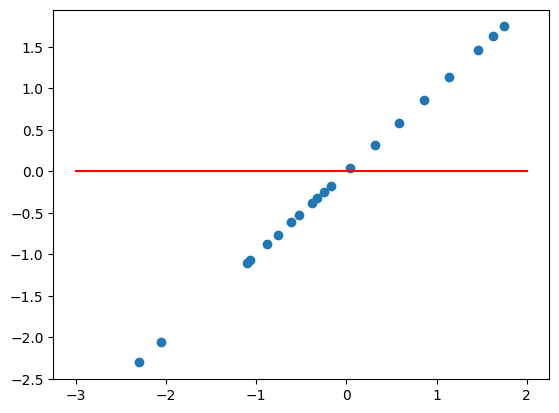

In [12]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [13]:
hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 0.47081140761582346


Как мы видим, численное значение ошибки значительно уменьшилось. Да и линия на графике существенно приблизилось к точкам. Конечно, наша модель еще далека от совершенства. Мы прошли всего лишь одну итерацию градиентного спуска. Модифицируем метод так, чтобы он запускался в цикле определенное количество раз:

In [14]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000): #метод градиентного спуска, принимает массив X и Y и обновляет параметры регрессии в соответствии в формулами градиентного спуска
        steps, errors = [], []
        step = 0
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0 #alpha - скорость обучения
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

Заодно мы расширили функциональность этого метода так, чтобы он возвращал массив ошибок на каждой итерации спуска и номер итерации.

In [15]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 5.801149898505763e-10


Как мы видим, теперь ошибка снизилась гораздо больше. Однако, она все еще не достигла нуля. Заметим, что нулевая ошибка не всегда возможна в принципе из-за того, что точки данных не всегда будут располагаться на одной линии. Кроме того, алгоритм градиентного спуска - численный и сходится в пределе, то есть после бесконечного количества повторений. Нужно стремиться не к нулевой, а к минимально возможной ошибке.

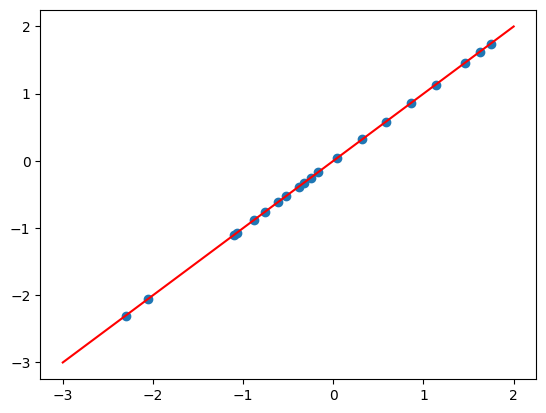

In [16]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

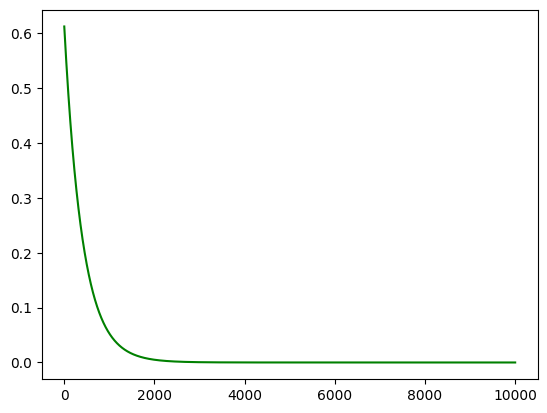

In [17]:
#глядя на график, сказать сложно, для этого нужно проанализировать, как ошибка регрессии менялась со временем:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

1. Проверьте работу модели с разными начальными значениями параметров. Убедитесь, что модель всегда сходится к оптимуму.


In [18]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self, b0, b1):
        self.b0 = b0
        self.b1 = b1
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [19]:
b0s = []
b1s = []
errors_dif_init = []
for i in range(20):
  b0 = np.random.normal(0,10)
  b1 = np.random.normal(0,10)
  b0s.append(b0)
  b1s.append(b1)
  hyp = Model(b0, b1)
  steps, errors = hyp.fit(x, y)
  J = hyp.error(x, y)
  errors_dif_init.append(J)
print('Минимум', min(errors_dif_init))
print('Максимум', max(errors_dif_init))

Минимум 8.524725019224851e-10
Максимум 1.8407568293277581e-06


2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.


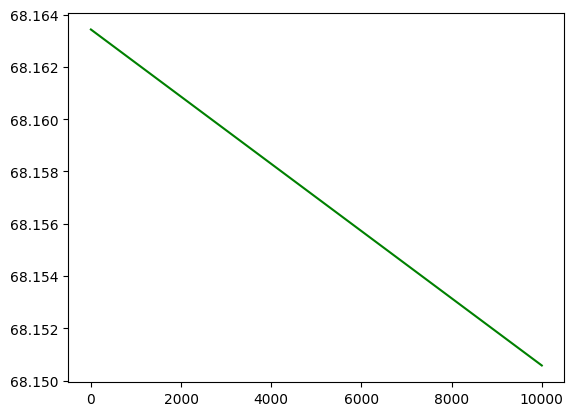

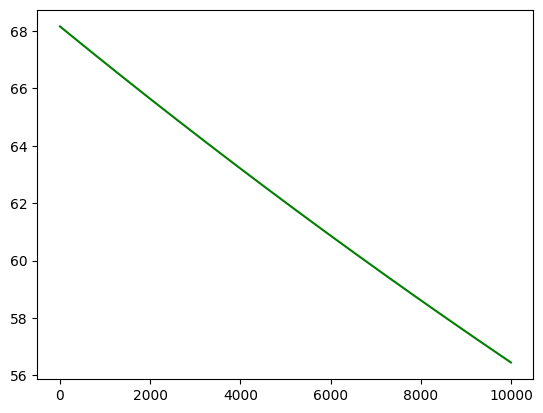

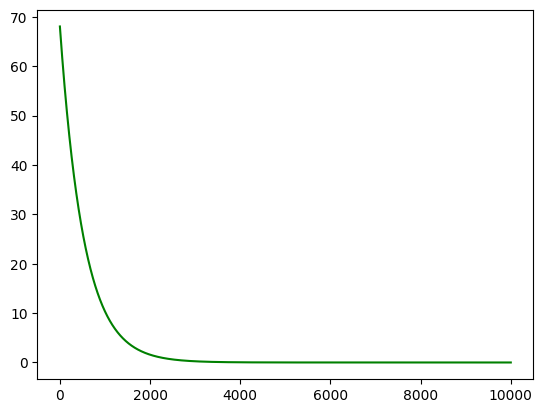

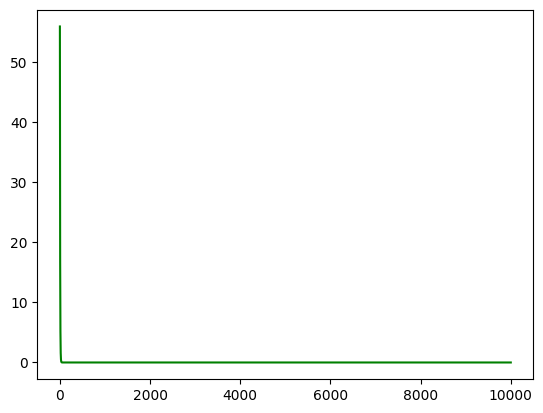

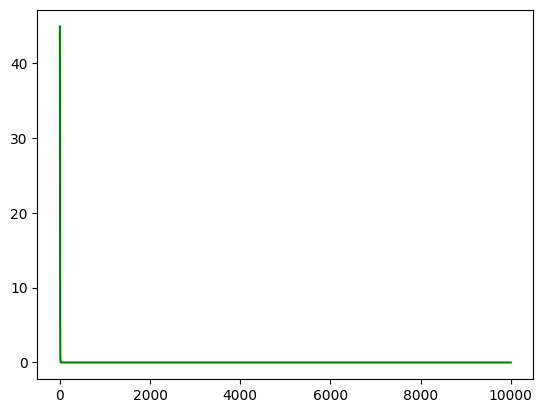

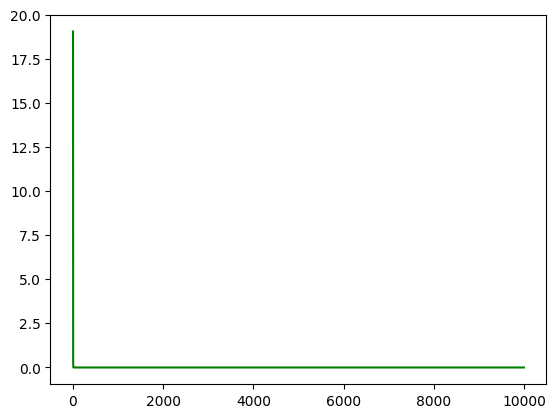

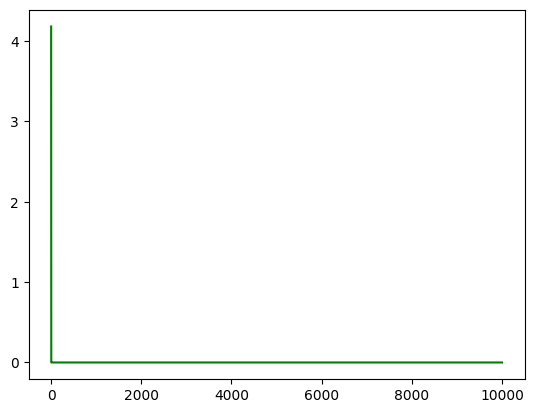

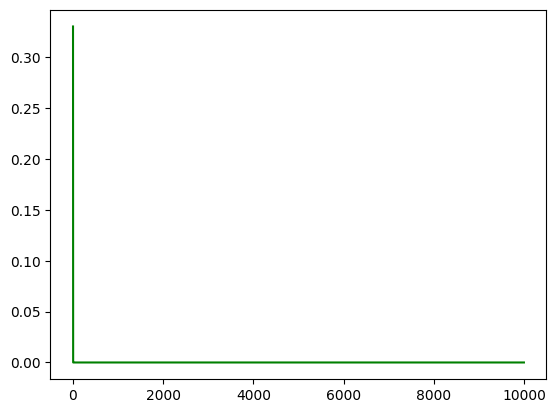

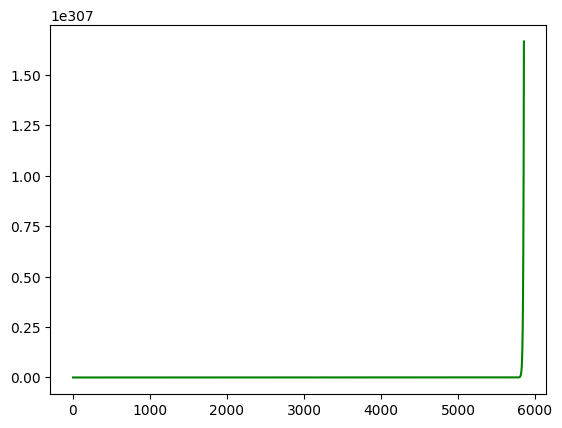

In [20]:
alpha = [0.00000001, 0.00001, 0.001, 0.1, 0.2, 0.5, 0.8, 1, 1.6]
for a in alpha:
    hyp = Model(b0, b1)
    steps, errors = hyp.fit(x, y, alpha = a)
    plt.figure()
    plt.plot(steps, errors, 'g')
    plt.show()

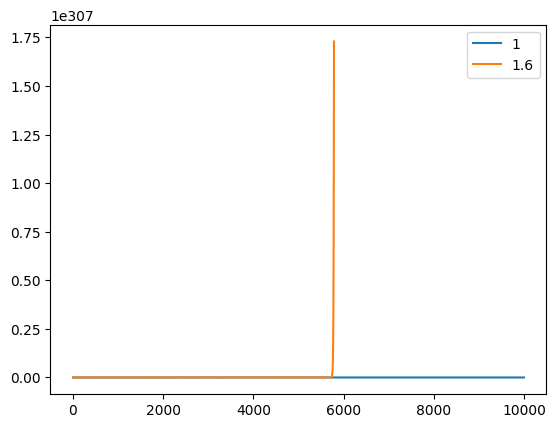

In [ ]:
alpha = [0.00000001, 0.00001, 0.001, 0.1, 0.2, 0.5, 0.8, 1, 1.6]
for a in alpha[-2:]:
    hyp = Model(b0, b1)
    steps, errors = hyp.fit(x, y, alpha = a)
    plt.plot(steps, errors, label = str(a))
plt.legend()

3. Модифицируйте код модели таким образом, чтобы он корректно работал как с Series, так и с DataFrame. При этом, конечно, датафрейм не должен содержать "лишних" столбцов.


In [21]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self, b0 = 0, b1 = 0):
        self.b0 = b0
        self.b1 = b1
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return np.array(np.sum(((self.predict(X) - Y)**2) / (2 * len(X)), axis=0)).item()
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0
        for _ in range(10_000):
            dJ0 = np.array(np.sum(self.predict(X) - Y, axis=0)).item() /len(X)
            dJ1 = np.array(np.sum((self.predict(X) - Y) * X, axis=0)).item() /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [24]:
#Так как датафрейм не должен содержат лишних столбцов, то удалим их при загрузке:
x_df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv').drop(columns = ['Unnamed: 0'])
y_df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv').drop(columns = ['Unnamed: 0'])
x_df.head()

,0
0,1.462108
1,1.133769
2,-2.301539
3,1.744812
4,0.042214


In [25]:
#для Series будем считывать файлы иначе:
x_s = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)['0']
y_s = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)['0']
x_s.head()

0    1.462108
1    1.133769
2   -2.301539
3    1.744812
4    0.042214
Name: 0, dtype: float64

In [26]:
#проверка, модель для датафрейма:
lin_regr = Model()
steps, errors = lin_regr.fit(x_df, y_df)
J = lin_regr.error(x_df, y_df)
print("error after gradient descent:", J)

error after gradient descent: 5.801149898505762e-10


In [27]:
#проверка, модель для series:
lin_regr = Model()
steps, errors = lin_regr.fit(x_s, y_s)
J = lin_regr.error(x_s, y_s)
print("error after gradient descent:", J)

error after gradient descent: 5.801149898505762e-10


4. Модифицируйте алгоритм градиентного спука таким образом, чтобы он останавливаля, если ошибка перестает снижаться. Для этого сравнивайте, на сколько понизилась ошибка на каждом шаге и если это снижение меньше некоторой заранее заданной очень маленькой величины - выходите из цикла. Эту величину можно взять одну миллионную, например.


In [42]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self, b0, b1):
        self.b0 = b0
        self.b1 = b1
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return np.array(np.sum(((self.predict(X) - Y)**2) / (2 * len(X)), axis=0)).item()
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ0 = np.array(np.sum(self.predict(X) - Y, axis=0)).item() /len(X)
            dJ1 = np.array(np.sum((self.predict(X) - Y) * X, axis=0)).item() /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            if len(errors) > 1:
              epsilon = new_err - errors[-1]
              if abs(epsilon) < accuracy and epsilon < 0 or epsilon > 0:
                break
            step += 1
            steps.append(step)
            errors.append(new_err)

        return steps, errors

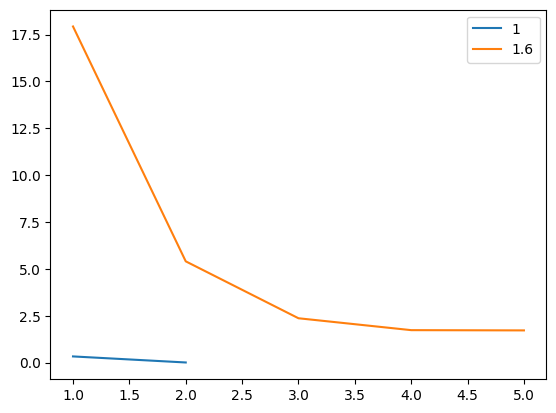

In [43]:
alpha = [0.00000001, 0.00001, 0.001, 0.1, 0.2, 0.5, 0.8, 1, 1.6]
for a in alpha[-2:]:
    hyp = Model(b0, b1)
    steps, errors = hyp.fit(x, y, alpha = a)
    plt.plot(steps, errors, label = str(a))
plt.legend()

5. Убедитесь, что алгоритм градиентного спуска завершается всегда - либо если ошибка перестает существенно меняться, либо при достижении максимального количества шагов.


In [44]:
hyp = Model(b0, b1)
steps, errors = hyp.fit(x_df, y_df, max_steps = 100)
err = lin_regr.error(x_df, y_df)
err

5.801149898505762e-10

In [47]:
hyp = Model(b0, b1)
steps, errors = hyp.fit(x_df, y_df, max_steps = 100000)
err = hyp.error(x_df, y_df)
err

5.308917516405543

6. Реализуйте механизм адаптивной скорости обучения. Чтобы не задавать вручную параметр alpha можно отслеживать, увеличивается ли ошибка после первого шага градиентного спуска. В начале задаем скорость обучения близкой к 1. Если ошибка после одного шага увеличивается - скорость обучения надо уменьшить (например, в 2 раза). Если не увеличивается - скорость обучения можно не трогать. Еще подумайте, как после уменьшения скорости перезапускать градиентный спуск заново.


In [37]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self, b0 = 0, b1 = 0):
        self.b0 = b0
        self.b1 = b1
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return np.array(np.sum(((self.predict(X) - Y)**2) / (2 * len(X)), axis=0)).item()
    def fit(self, X, Y, alpha=0.999, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ0 = np.array(np.sum(self.predict(X) - Y, axis=0)).item() /len(X)
            dJ1 = np.array(np.sum((self.predict(X) - Y) * X, axis=0)).item() /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            step += 1
            if len(errors) != 0 and errors[-1] < new_err:
                alpha = alpha // 2
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [38]:
hyp = Model()
steps, errors = hyp.fit(x_df, y_df, max_steps = 10_000)
J = hyp.error(x_df, y_df)
print("error after gradient descent:", J)

error after gradient descent: 0.0
